In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

In [41]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [42]:
people

{'data': array([[ 86.      ,  90.666664,  98.666664, ...,  27.      ,  28.333334,
          26.333334],
        [ 21.666666,  22.666666,  27.333334, ...,  72.      ,  68.666664,
          65.333336],
        [212.66667 , 229.33333 , 239.66667 , ...,  40.333332,  51.333332,
          57.      ],
        ...,
        [ 11.333333,  21.333334,  32.      , ..., 249.      , 248.      ,
         250.66667 ],
        [ 58.666668,  75.      ,  80.333336, ..., 148.33333 , 109.      ,
          38.333332],
        [ 37.666668,  38.333332,  43.      , ...,  36.333332,  38.666668,
          39.666668]], dtype=float32),
 'images': array([[[ 86.       ,  90.666664 ,  98.666664 , ...,  98.666664 ,
           89.666664 , 114.666664 ],
         [ 77.333336 ,  83.       ,  99.333336 , ..., 105.666664 ,
           91.666664 , 110.666664 ],
         [ 78.666664 ,  89.666664 , 103.       , ..., 109.       ,
           98.       , 106.666664 ],
         ...,
         [ 22.666666 ,  11.       ,  10.       , .

In [43]:
image_shape = people.images[0].shape

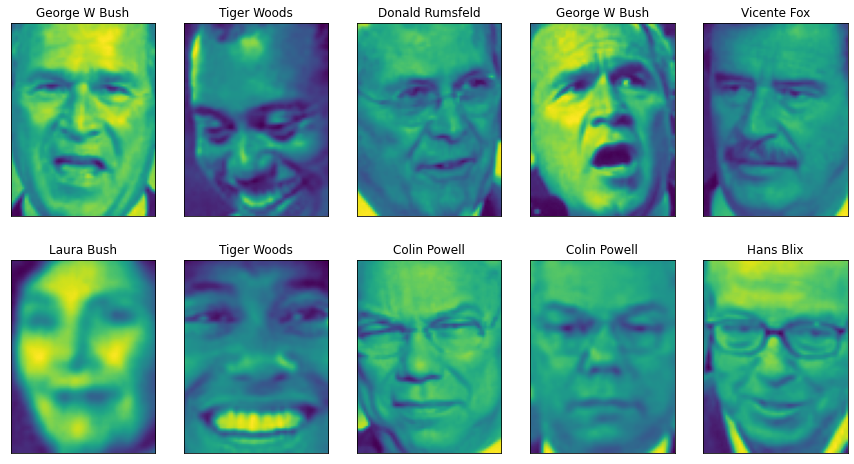

In [44]:
fix, axes = plt.subplots(2,5, figsize=(15,8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [45]:
print(f"people.image.shape : {people.images.shape}")
print(f"Number of classes : {len(people.target_names)}")

people.image.shape : (1875, 87, 65)
Number of classes : 26


In [46]:
counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25}{1:3}".format(name, count), end = ' ')
    if (i+1)%3 == 0:
        print()

Alejandro Toledo          39 Amelie Mauresmo           21 Andre Agassi              36 
Ariel Sharon              77 Atal Bihari Vajpayee      24 Bill Clinton              29 
Colin Powell             236 Donald Rumsfeld          121 George W Bush            530 
Gerhard Schroeder        109 Gloria Macapagal Arroyo   44 Hamid Karzai              22 
Hans Blix                 39 Igor Ivanov               20 Junichiro Koizumi         60 
Kofi Annan                32 Laura Bush                41 Lleyton Hewitt            41 
Megawati Sukarnoputri     33 Pete Sampras              22 Saddam Hussein            23 
Serena Williams           52 Tiger Woods               23 Tom Daschle               25 
Tony Blair               144 Vicente Fox               32 

In [47]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

In [48]:
X_people = X_people/255.

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# KNeighborsClassifier を 1- 最近傍で構築
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn : {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn : 0.43


In [51]:
X_train[0].shape

(5655,)

In [52]:
im = people.data.reshape(1875,87,65)

In [53]:
people.images

array([[[ 86.       ,  90.666664 ,  98.666664 , ...,  98.666664 ,
          89.666664 , 114.666664 ],
        [ 77.333336 ,  83.       ,  99.333336 , ..., 105.666664 ,
          91.666664 , 110.666664 ],
        [ 78.666664 ,  89.666664 , 103.       , ..., 109.       ,
          98.       , 106.666664 ],
        ...,
        [ 22.666666 ,  11.       ,  10.       , ...,  21.333334 ,
          26.       ,  24.333334 ],
        [ 11.333333 ,  12.333333 ,  10.       , ...,  25.       ,
          27.333334 ,  24.666666 ],
        [ 12.333333 ,  12.333333 ,   8.       , ...,  27.       ,
          28.333334 ,  26.333334 ]],

       [[ 21.666666 ,  22.666666 ,  27.333334 , ...,  18.       ,
          19.333334 ,  22.       ],
        [ 22.333334 ,  25.       ,  29.666666 , ...,  16.333334 ,
          21.       ,  23.       ],
        [ 25.       ,  27.666666 ,  32.666668 , ...,  18.666666 ,
          24.       ,  23.333334 ],
        ...,
        [ 40.       ,  39.666668 ,  38.666668 , ...,  

In [54]:
im

array([[[ 86.       ,  90.666664 ,  98.666664 , ...,  98.666664 ,
          89.666664 , 114.666664 ],
        [ 77.333336 ,  83.       ,  99.333336 , ..., 105.666664 ,
          91.666664 , 110.666664 ],
        [ 78.666664 ,  89.666664 , 103.       , ..., 109.       ,
          98.       , 106.666664 ],
        ...,
        [ 22.666666 ,  11.       ,  10.       , ...,  21.333334 ,
          26.       ,  24.333334 ],
        [ 11.333333 ,  12.333333 ,  10.       , ...,  25.       ,
          27.333334 ,  24.666666 ],
        [ 12.333333 ,  12.333333 ,   8.       , ...,  27.       ,
          28.333334 ,  26.333334 ]],

       [[ 21.666666 ,  22.666666 ,  27.333334 , ...,  18.       ,
          19.333334 ,  22.       ],
        [ 22.333334 ,  25.       ,  29.666666 , ...,  16.333334 ,
          21.       ,  23.       ],
        [ 25.       ,  27.666666 ,  32.666668 , ...,  18.666666 ,
          24.       ,  23.333334 ],
        ...,
        [ 40.       ,  39.666668 ,  38.666668 , ...,  

In [55]:
import mglearn

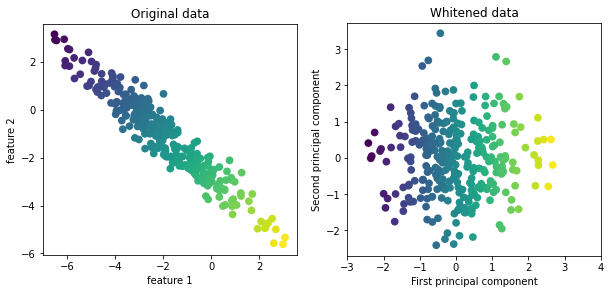

In [56]:
mglearn.plots.plot_pca_whitening()

In [57]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape : {}".format(X_train_pca.shape))

X_train_pca.shape : (709, 100)


In [58]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy : {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy : 0.46


In [59]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (100, 5655)


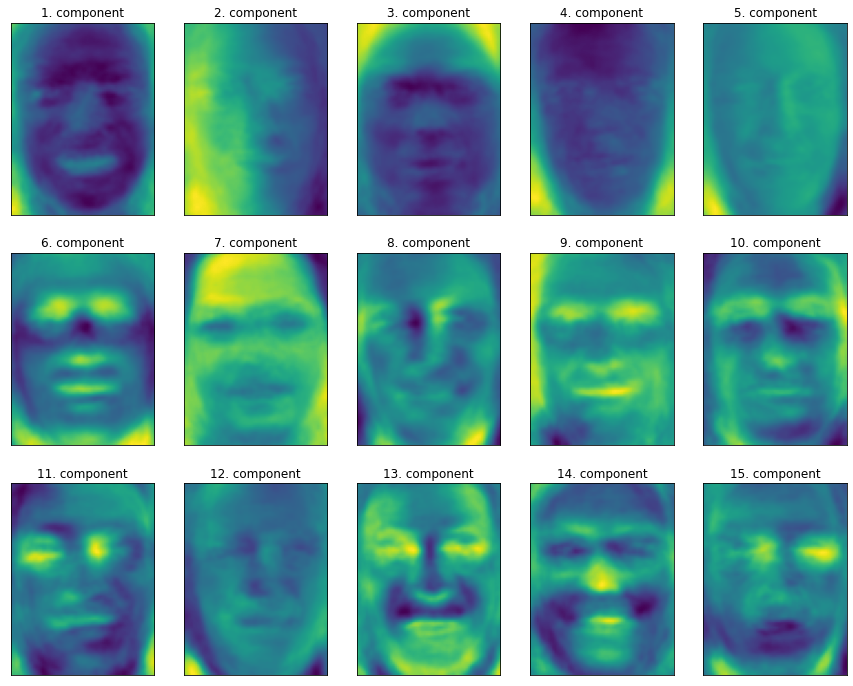

In [60]:
fix, axes = plt.subplots(3,5,figsize=(15,12), subplot_kw={'xticks': (),'yticks':()})

for i, (component, ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("{}. component".format((i+1)))

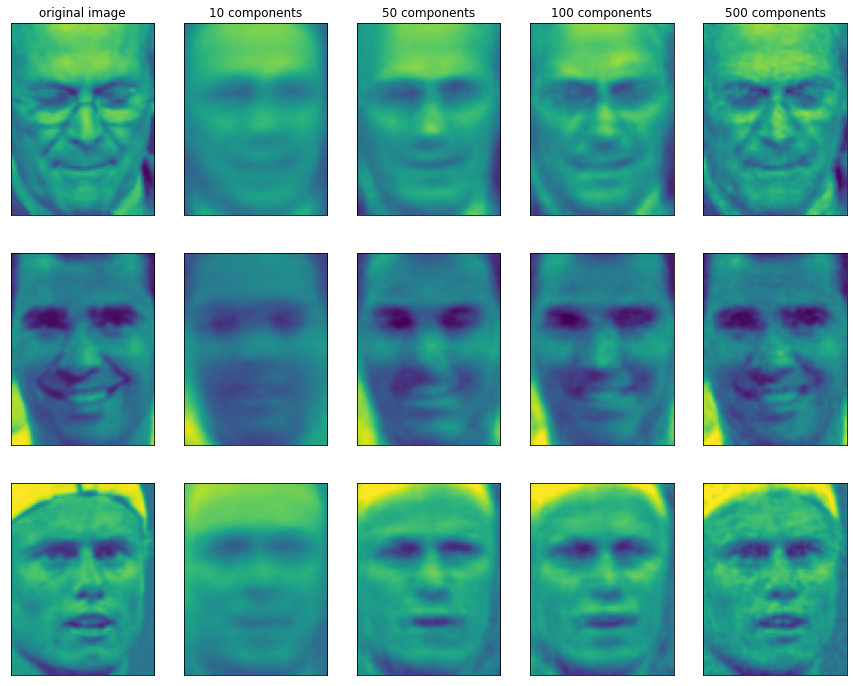

In [61]:
mglearn.plots.plot_pca_faces(X_train,X_test,image_shape)

Text(0, 0.5, 'Second principal component')

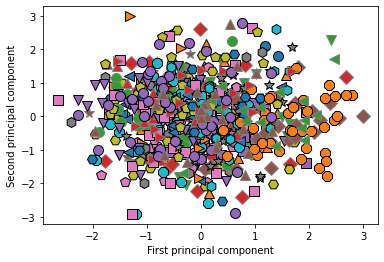

In [62]:
mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

## 非負値行列因子分解 (NMF Non-negative matrix factorization)

c:\Users\shora\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\Users\shora\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
c:\Users\shora\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\Users\shora\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterat

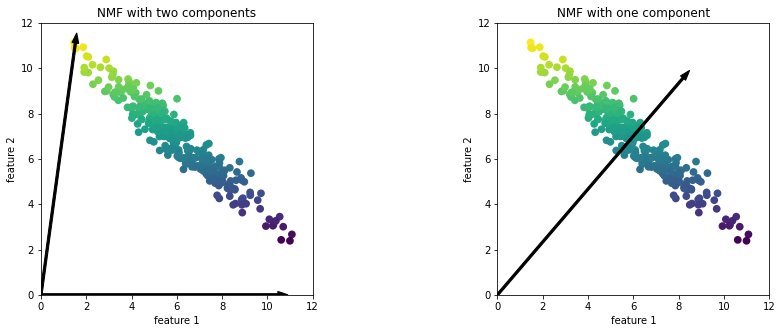

In [63]:
mglearn.plots.plot_nmf_illustration()

In [64]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.151634, ..., 0.779085],
       ...,
       [0.924183, ..., 0.898039]], dtype=float32), 
array([[0.618301, ..., 0.411765],
       ...,
       [0.096732, ..., 0.176471]], dtype=float32))


c:\Users\shora\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\Users\shora\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
c:\Users\shora\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\Users\shora\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterat

KeyboardInterrupt: 

c:\Users\shora\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\Users\shora\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


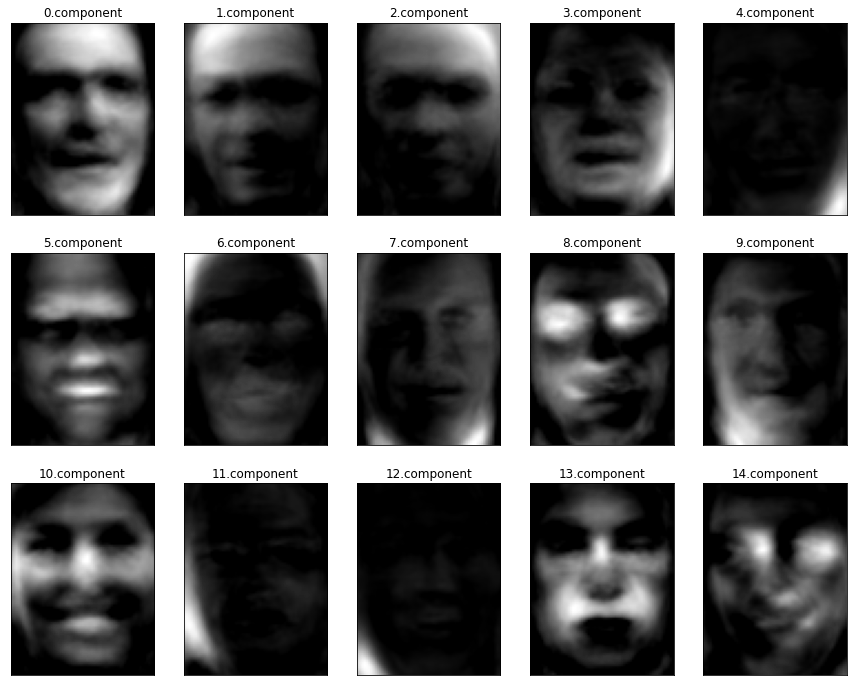

In [65]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3,5, figsize=(15,12), subplot_kw = {'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),'gray')
    ax.set_title("{}.component".format(i))

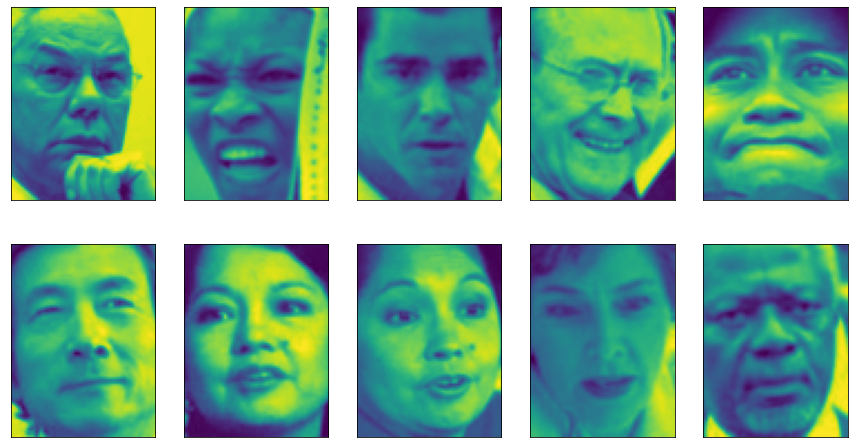

In [66]:
compn = 3
inds = np.argsort(X_train_nmf[:,compn])[::-1]

fig, axes = plt.subplots(2,5,figsize=(15,8), subplot_kw={'xticks': (),'yticks':()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

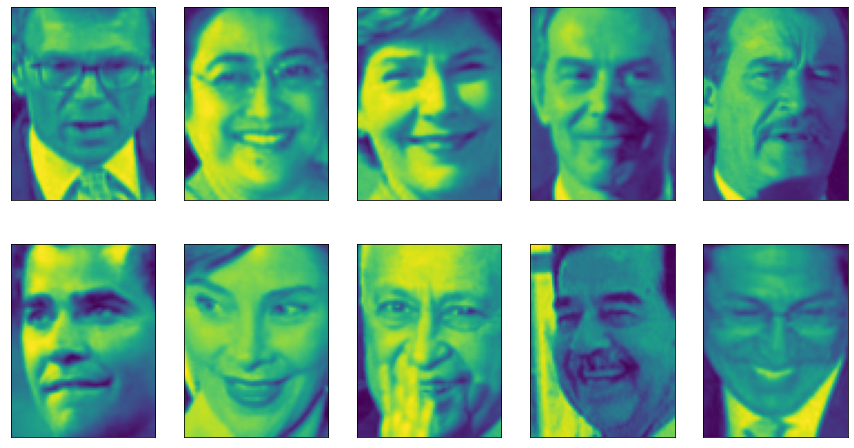

In [67]:
compn = 9

inds = np.argsort(X_train_nmf[:,compn])[::-1]

fig, axes = plt.subplots(2,5,figsize=(15,8), subplot_kw={'xticks': (),'yticks':()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

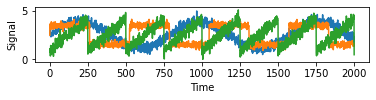

In [68]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [72]:
# データを混ぜて100次元の状態を作る
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [73]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


c:\Users\shora\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\Users\shora\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [74]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

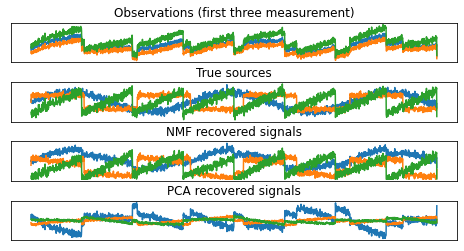

In [75]:
models = [X, S, S_, H]
names = ["Observations (first three measurement)", "True sources", "NMF recovered signals", "PCA recovered signals"]

fig, axes = plt.subplots(4, figsize=(8,4), gridspec_kw={'hspace':.5},subplot_kw={'xticks':(), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')

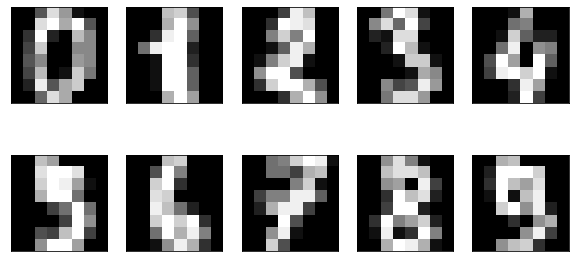

In [77]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2,5, figsize=(10,5), subplot_kw={'xticks':(), "yticks": ()})

for ax, img, in zip(axes.ravel(), digits.images):
    ax.imshow(img, 'gray')

In [83]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [86]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Text(0, 0.5, 'Second principal component')

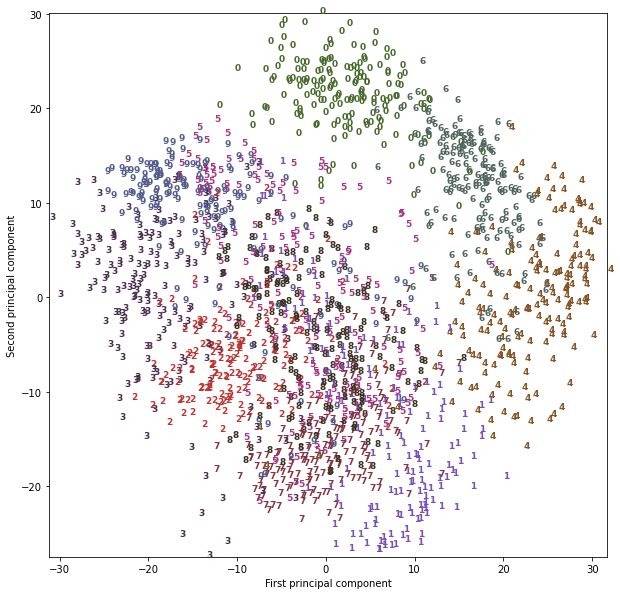

In [88]:
# PCAモデルを構築
pca = PCA(n_components=2)
pca.fit(digits.data)

# 数値データを最初の2主成分で変形
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())

for i in range(len(digits.data)):
    # 散布図をプロット
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight':"bold", "size":9})

plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [89]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# fit ではなくfit_transform を用いる．TSNE にはtransform　メソッドがない
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

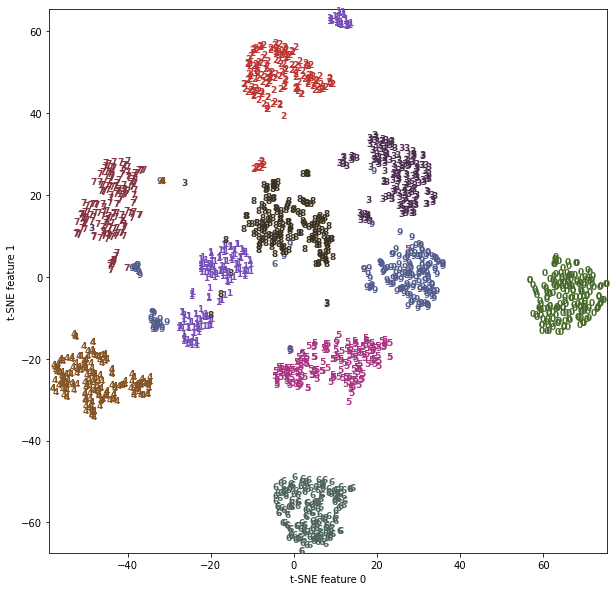

In [92]:
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(),digits_tsne[:,1].max()+1)

for i in range(len(digits.data)):
    # 点ではなく数字をテキストとしてプロットする
    plt.text(digits_tsne[i,0], digits_tsne[i,1],str(digits.target[i]),color=colors[digits.target[i]],fontdict={"weight":"bold","size":9})

plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

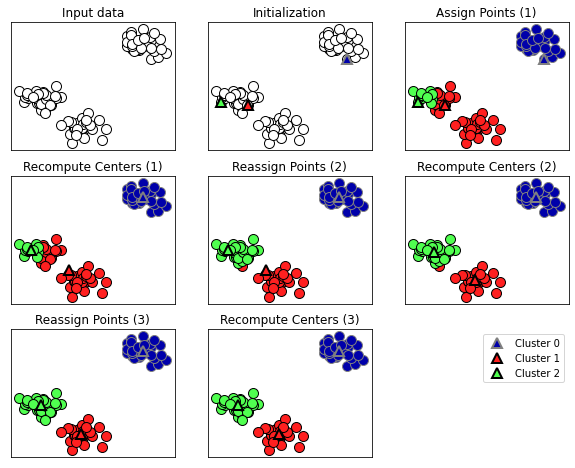

In [94]:
mglearn.plots.plot_kmeans_algorithm()

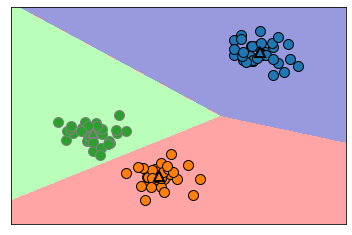

In [95]:
mglearn.plots.plot_kmeans_boundaries()

In [96]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 合成2次元データを作る
X, y = make_blobs(random_state=1)

# クラスタリングモデルを作る
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [97]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [98]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]
